In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder

# escolhi apenas trabalhar com a marca de veículos BMW
df = pd.read_csv('./dataset/bmw.csv')
df.head()

models = df.groupby("model")

for model in models.groups.keys():
    print(model, ': ', len(models.groups[model]))

 1 Series :  1969
 2 Series :  1229
 3 Series :  2443
 4 Series :  995
 5 Series :  1056
 6 Series :  108
 7 Series :  106
 8 Series :  39
 M2 :  21
 M3 :  27
 M4 :  125
 M5 :  29
 M6 :  8
 X1 :  804
 X2 :  288
 X3 :  551
 X4 :  179
 X5 :  468
 X6 :  106
 X7 :  55
 Z3 :  7
 Z4 :  108
 i3 :  43
 i8 :  17


<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 8 to 10703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         995 non-null    object 
 1   year          995 non-null    int64  
 2   price         995 non-null    int64  
 3   transmission  995 non-null    object 
 4   mileage       995 non-null    int64  
 5   fuelType      995 non-null    object 
 6   tax           995 non-null    int64  
 7   mpg           995 non-null    float64
 8   engineSize    995 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 77.7+ KB

 shape of X:  (995, 7)
shape of y (995,)

 year


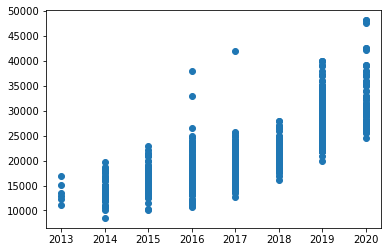


 transmission


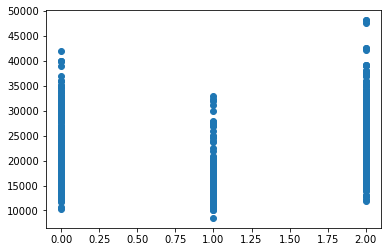


 mileage


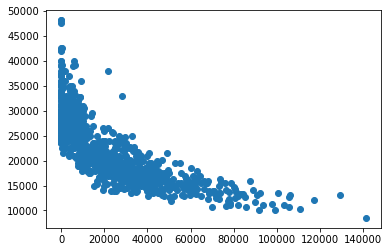


 fuelType


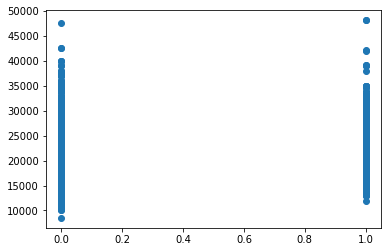


 tax


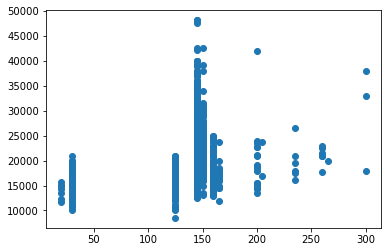


 mpg


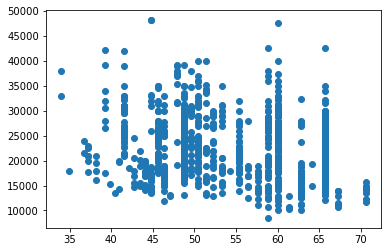


 engineSize


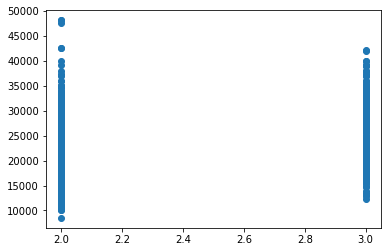

In [2]:
# filtrar apenas registros do modelo "4 Series" da BMW
data = df[df["model"].str.contains("4 Series")]

data.info()

# tratando as colunas com texto ['transmission', 'fuelType']
encoder = LabelEncoder()
data["transmission"] = encoder.fit_transform(data["transmission"])
data["fuelType"] = encoder.fit_transform(data["fuelType"])

# X representa todas as colunas exceto price e model
X = data.drop(columns=["price", "model"])
y = data["price"]

print("\n", "shape of X: ", X.shape)
print("shape of y", y.shape)

# para cada coluna gerar um gráfico de correlação entre característica e preço
for column in X.columns:
    print('\n', column)
    arr = X[column].unique()
    
    plt.scatter(X[column], y)
    plt.show()

In [3]:
class regressao_linear():
    def __init__(self):
        # como temos um modelo de 8 colunas incluindo o target, criei uma matriz de 8 colunas e 1 linha
        self.w = np.zeros((8,1))
        
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b = np.concatenate((bias,X),axis=1)
        return X_b

    # não é utilizado no nosso problema, utilizamos a classe LinearRegression do sklearn para calcular o Intercept e o Slope
    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)
            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1, 1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):        
        X_b = self.addBias(X)
        # multiplicação de matrizes 995x8 * 8x1
        y = X_b.dot(self.w)
        return y

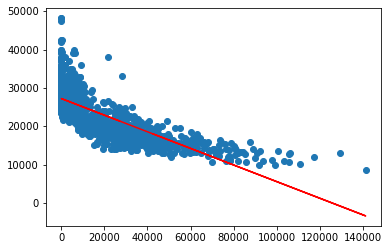

Intercept:  -4530973.584349445 
Slope:  [ 2.26570414e+03 -9.20614415e+01 -8.69625552e-02 -4.03294758e+03
 -3.65363138e+00 -2.93376833e+02  1.10958745e+03] 
MSE:  8379103.117784096 



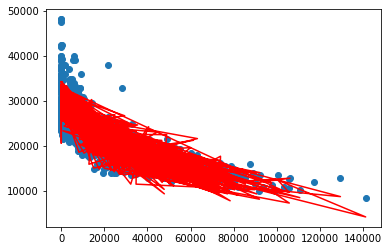

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

modelo = LinearRegression()

modelo.fit(Xcol, y)

y_pred = modelo.predict(Xcol)

plt.scatter(Xcol, y)
plt.plot(Xcol, y_pred, 'r')
plt.show()

modelo.fit(X, y)

y_pred = modelo.predict(X)

mse = mean_squared_error(y, y_pred)

print('Intercept: ', modelo.intercept_, '\nSlope: ', modelo.coef_, '\nMSE: ', mse, '\n')

# Mileage foi a coluna escolhida pois a variação da kilometragem tem uma relação inversamente proporcional com o preço, sendo uma boa opção para aplicar Regressão Linear
Xcol = np.array(X["mileage"]).reshape(-1, 1)

plt.scatter(Xcol, y)
plt.plot(Xcol, y_pred, 'r')
plt.show()


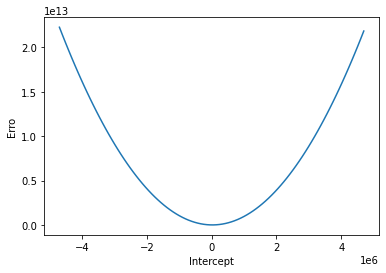

In [7]:
mi = 1000000

# como o Intercept ficou aproxamadamente em -4.53mi, fui testando um valor até o delta de +/-4.695 que gerou um bom gráfico
w0 = np.linspace(-4.695*mi, 4.695*mi, 100)
w1 = modelo.coef_

def z_function(W0, W1):
    modelo_regressao = regressao_linear()    
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo_regressao.w[0] = W0[j][k]
            modelo_regressao.w[1] = W1[j][k]
            y_pred = modelo_regressao.predict(X)
            mse = mean_squared_error(y, y_pred)
            Erro[j][k] = mse
    return Erro

# Criação da matriz de dados para calcular Z, nesse caso representa o Erro baseado em MSE
W0, W1 = np.meshgrid(w0, w1)
Erro = z_function(W0, W1)

plt.ylabel("Erro")
plt.xlabel("Intercept")
i=2
plt.plot(W0[i,:], Erro[i,:])
plt.show()